In [16]:
#read the data file and coresponding segment boundaries
users = [1,2,4,5,7,8,9,10,11,12,13,14,15,16,17,18]
user_list = [str(x) for x in users]
#segment boundaries file
segment_file_path = "H:\\Documents\\Research\\Matlabl Source Codes\\FeatureExtraction\\statistics\\emotion-5TT\\"
segment_file_name = "emotion_12_segment.csv"
#user data files
user_file_path = "C:\\Users\\e94486\\Documents\\Dataset\\AngryOrClimbingStairs\\PreprocessedData\\rawData\\"
user_file_name = "nolabel_S_E_Emotion_p{}_sensorFusion.csv"

In [75]:
def find_nonoverlapping_boundaries(cp_list, threshold):
    t =[0]
    for i in cp_list:
        dif = [abs(x - i) for x in t]
        if all(x >= threshold for x in dif):
            t.append(i)
         
    return t

In [101]:
#for matrix math
import numpy as np
#for data preprocessing
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline
#for normalization + probability density function computation
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
print("import done")

import done


(18, 12)
TT >>> 7


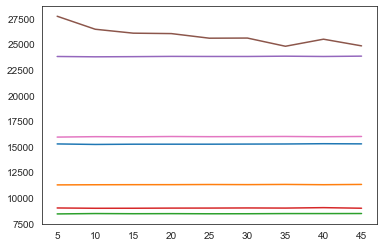

In [103]:
seg_boundaries = pd.read_csv(segment_file_path+segment_file_name, header=None)
seg = np.array(seg_boundaries)
print(seg_boundaries.shape)
n_components = np.arange(5, 50, 5)
for x in [1]:
    data = np.array(pd.read_csv(user_file_path + user_file_name.format(x)))
    [len_TS, num_TS ] = data.shape
    
    TT = sorted(find_nonoverlapping_boundaries(seg[x-1,0:-1], 3000))
    print("TT >>>", len(TT))
    TT.append(len_TS)   
    for t in range(1,len(TT),1):
    #for t in range(1,2):
        #ts = data[TT[t-1]:TT[t], :]
        # For data visiualisation calculate left and right of the graph
        
        pca = PCA(0.99, whiten=True)
        ts = pca.fit_transform(data[TT[t-1]:TT[t], :])
        ts.shape      
        
        models = [GaussianMixture(n) for n in n_components]
        aics = [model.fit(ts).aic(ts) for model in models]
        bics = [model.fit(ts).bic(ts) for model in models]
        plt.plot(n_components, aics);
        #gmm = GaussianMixture(n_components = C, tol=0.000001)
        #gmm.fit(ts) # Parameters: array-like, shape (n_samples, n_features), 1 dimension dataset so 1 feature
        #print(gmm)
        Gaussian_nr = 1
        # predict latent values
        #yhat = gmm.predict_proba(ts)
       
        #print(yhat[:5].round(3))
        #plt.plot(yhat)
        #print("yhat shape: ",yhat.shape)
        #for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
        #    print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
        #sns.distplot(ts, bins=20, kde=False, norm_hist=True)
        #gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in x]) #gmm gives log probability, hence the exp() function
        #plt.plot(x, gmm_sum, label='gaussian mixture');
        #plt.legend();

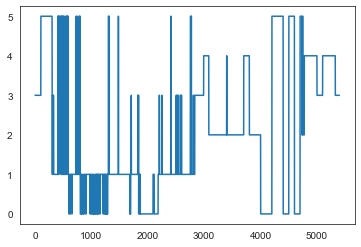

In [97]:
plt.plot(yhat)